## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
y_train.shape

(50000, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

def build_mlp(input,output):
    """Code Here
    建立你的神經網路
    """
    model = Sequential()
    model.add(Dense(256,input_dim = input, activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output, activation='softmax'))
    return model

In [0]:
"""Code Here
設定超參數
"""
LR =[1e-4, 1e-3, 5e-3, 1e-2,5e-2,1e-1,5e-1]
epochs = 10
batch_size =256

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

from keras.optimizers import Adam

results = {}

for lr in LR:
    model = build_mlp(x_train.shape[1], y_train.shape[1])
    model.summary()
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=lr), metrics=["accuracy"])
    model.fit(x_train, y_train, 
              epochs=epochs, 
              batch_size=batch_size, 
              validation_split=0.2, 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results[lr] = {'train-loss': train_loss,'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/10





40000/40000 [==============================] - 6s 142us/step - loss: 1.9743 - 

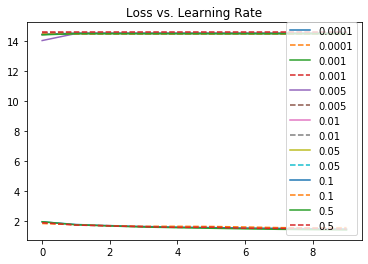

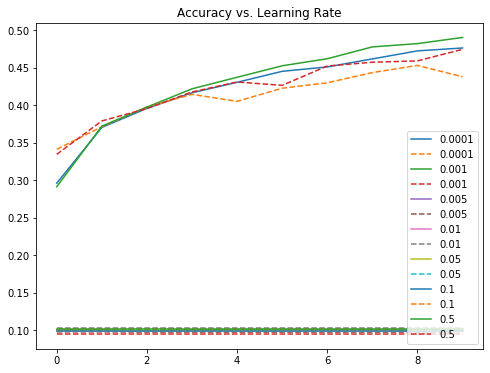

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
#NUM_COLORS = len(results.keys())
#cm = plt.get_cmap('gist_rainbow')
#color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-loss'])),results[j]['train-loss'], '-', label=j)
    plt.plot(range(len(results[j]['valid-loss'])),results[j]['valid-loss'], '--', label=j)
plt.title("Loss vs. Learning Rate")
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-acc'])),results[j]['train-acc'], '-', label=j)
    plt.plot(range(len(results[j]['valid-acc'])),results[j]['valid-acc'], '--', label=j)
plt.title("Accuracy vs. Learning Rate")
plt.legend(loc=4)
plt.show()